ご提示いただいた主成分分析 (PCA) の理論について、期待値が0である中心化済みデータ行列 $X$ （$n$ 個のサンプル $\times$ $p$ 個の変数）から出発して、その論理展開と主要な公式の導出を行います。

---

### 1. 前提と分散共分散行列

* **中心化済みデータ行列 $X$**: $n \times p$ の行列。各列（変数） $x_1, \dots, x_p$ の平均は 0 です。
* **標本分散共分散行列 $\Sigma$**: $p \times p$ の行列で、 $\Sigma = \frac{1}{n-1} X^T X$ と定義されます（$n$ で割る定義もありますが、本質は変わりません）。
    * $\Sigma$ の $(i, j)$ 成分 $\Sigma_{ij}$ は、変数 $x_i$ と $x_j$ の共分散 $\text{Cov}[x_i, x_j]$ を表します。
    * $\Sigma$ の対角成分 $\Sigma_{ii}$ は、変数 $x_i$ の分散 $V[x_i]$ を表します。
    * $\Sigma$ は実対称行列です。

---

### 2. 主成分の導出（分散共分散行列 $\Sigma$）

PCAの目的は、元の変数 $x_1, \dots, x_p$ の線形結合によって、互いに無相関で、分散が最大となる新しい変数（主成分） $y_1, \dots, y_p$ を見つけることです。

#### 🚀 第1主成分 $y_1$

第1主成分 $y_1$ を、重みベクトル $\mathbf{w}_1 = (w_{11}, \dots, w_{p1})^T$ を用いて以下のように定義します。

$$
y_1 = w_{11} x_1 + w_{21} x_2 + \dots + w_{p1} x_p = \mathbf{x}^T \mathbf{w}_1
$$

この $y_1$ の分散 $V[y_1]$ を最大化します。

$$
V[y_1] = V[\mathbf{x}^T \mathbf{w}_1] = \mathbf{w}_1^T V[\mathbf{x}] \mathbf{w}_1 = \mathbf{w}_1^T \Sigma \mathbf{w}_1
$$

ただし、重みの大きさに制約がないと分散は無限に大きくなってしまうため、 $\|\mathbf{w}_1\|^2 = \mathbf{w}_1^T \mathbf{w}_1 = 1$ という制約を設けます。

この最大化問題は、ラグランジュの未定乗数法を用いて解くことができます。

$$
L(\mathbf{w}_1, \lambda_1) = \mathbf{w}_1^T \Sigma \mathbf{w}_1 - \lambda_1 (\mathbf{w}_1^T \mathbf{w}_1 - 1)
$$

$L$ を $\mathbf{w}_1$ で偏微分して 0 とおくと、

$$
\frac{\partial L}{\partial \mathbf{w}_1} = 2 \Sigma \mathbf{w}_1 - 2 \lambda_1 \mathbf{w}_1 = 0 \implies \Sigma \mathbf{w}_1 = \lambda_1 \mathbf{w}_1
$$

これは、$\lambda_1$ が $\Sigma$ の**固有値**、 $\mathbf{w}_1$ が対応する**固有ベクトル**であることを示す式（固有方程式）です。

このとき、 $y_1$ の分散は、
$V[y_1] = \mathbf{w}_1^T \Sigma \mathbf{w}_1 = \mathbf{w}_1^T (\lambda_1 \mathbf{w}_1) = \lambda_1 (\mathbf{w}_1^T \mathbf{w}_1) = \lambda_1$
となります。

$V[y_1]$ を最大化するためには、$\Sigma$ の固有値のうち**最大のものを $\lambda_1$** とし、$\mathbf{w}_1$ を $\lambda_1$ に対応するノルム1の固有ベクトルとします。

#### 🚀 第i主成分 $y_i$

第2主成分 $y_2 = \mathbf{x}^T \mathbf{w}_2$ は、 $V[y_2]$ を最大化し、かつ $y_1$ と無相関（ $\text{Cov}[y_1, y_2] = 0$ ）という制約のもとで求められます。
同様に、第 $i$ 主成分 $y_i = \mathbf{x}^T \mathbf{w}_i$ は、 $V[y_i]$ を最大化し、かつ $y_1, \dots, y_{i-1}$ と無相関という制約のもとで求められます。

この結果、第 $i$ 主成分 $y_i$ を定義する重みベクトル $\mathbf{w}_i = (w_{1i}, \dots, w_{pi})^T$ は、$\Sigma$ の **$i$ 番目に大きい固有値 $\lambda_i$ に対応するノルム1の固有ベクトル**となります。

$$
\Sigma \mathbf{w}_i = \lambda_i \mathbf{w}_i
$$

これにより、ご提示いただいた**第i主成分の公式**が導かれます。

$$
y_i = w_{1i} x_1 + w_{2i} x_2 + \dots + w_{pi} x_p
$$

また、その分散は $V[y_i] = \lambda_i$ となります（$\lambda_1 \ge \lambda_2 \ge \dots \ge \lambda_p \ge 0$）。
主成分同士の共分散は $\text{Cov}[y_i, y_j] = \mathbf{w}_i^T \Sigma \mathbf{w}_j = \mathbf{w}_i^T (\lambda_j \mathbf{w}_j) = \lambda_j (\mathbf{w}_i^T \mathbf{w}_j) = 0$ ($i \neq j$) となり、無相関であることも満たされます。

---

### 3. 全分散の保存（分散共分散行列）

元の変数の全分散は、$\Sigma$ の対角成分の和（トレース）です。
$\text{Tr}(\Sigma) = \sum_{i=1}^p \Sigma_{ii} = \sum_{i=1}^p V[x_i]$

主成分の全分散は、$\lambda_i$ の総和です。
$\sum_{i=1}^p V[y_i] = \sum_{i=1}^p \lambda_i$

線形代数の定理より、**行列のトレース（対角和）はその行列の固有値の総和に等しい**ため、

$$
\text{Tr}(\Sigma) = \sum_{i=1}^p \lambda_i
$$

が成り立ちます。したがって、

$$
V[x_1] + V[x_2] + \dots + V[x_p] = \lambda_1 + \lambda_2 + \dots + \lambda_p
$$

となり、**全分散の保存**が示されました。

---

### 4. 相関行列 $R$ からのアプローチ

これは、元の変数 $x_i$ をあらかじめ標準化（平均0、分散1）した場合のPCAに相当します。中心化済みの $x_i$ をその標準偏差 $s_i = \sqrt{V[x_i]} = \sqrt{\Sigma_{ii}}$ で割ります。

$$
z_i = \frac{x_i}{s_i}
$$

この標準化された変数 $z_1, \dots, z_p$ の分散共分散行列は、元の変数の**標本相関行列 $R$** と一致します。
$R_{ij} = \text{Cov}[z_i, z_j] = \frac{\text{Cov}[x_i, x_j]}{s_i s_j} = \frac{\Sigma_{ij}}{\sqrt{\Sigma_{ii}} \sqrt{\Sigma_{jj}}}$

$R$ は対角成分がすべて $V[z_i] = 1$ である対称行列です。

この $R$ に対して、分散共分散行列 $\Sigma$ と全く同じ論理（固有値問題）を適用します。

* $R$ の固有値を $\lambda_1 \ge \dots \ge \lambda_p \ge 0$、対応する固有ベクトルを $\mathbf{w}_1, \dots, \mathbf{w}_p$ とします。
* 第 $i$ 主成分 $y_i$ は、**標準化された変数 $z_i$** の線形結合として定義されます。

$$
y_i = w_{1i} z_1 + w_{2i} z_2 + \dots + w_{pi} z_p
$$

* 第 $i$ 主成分の分散は $V[y_i] = \lambda_i$ です。

これにより、ご提示いただいた**相関行列に対する主成分の公式**が導かれます。

#### 全分散の保存（相関行列）

元の（標準化された）変数の全分散は、
$\sum_{i=1}^p V[z_i] = \sum_{i=1}^p 1 = p$

主成分の全分散は $\sum_{i=1}^p \lambda_i$ です。

$\Sigma$ の場合と同様に、 $\text{Tr}(R) = \sum_{i=1}^p \lambda_i$ が成り立ちます。
$R$ のトレースは $\text{Tr}(R) = \sum_{i=1}^p R_{ii} = \sum_{i=1}^p 1 = p$ です。

したがって、

$$
\lambda_1 + \lambda_2 + \dots + \lambda_p = p
$$

となり、相関行列の場合の**全分散（= p）の保存**が示されました。

---

### 5. 寄与率、累積寄与率、主成分得点

これらは、上記で導出された量からの定義です。

* **寄与率**: 全分散 $\sum \lambda_j$（分散共分散行列の場合は $\sum V[x_j]$、相関行列の場合は $p$）のうち、第 $i$ 主成分の分散 $\lambda_i$ が占める割合 $\frac{\lambda_i}{\sum \lambda_j}$。
* **累積寄与率**: 寄与率を $i=1$ から累積したもの。
* **主成分得点**: 導出された $y_i$ の式に、観測された個々のデータ（$k$ 番目のサンプル）の（標準化済み）値 $(z_{k1}, \dots, z_{kp})$ を代入して得られる値 $y_{ki}$。

---

### 6. 主成分負荷量の導出

主成分負荷量は、元の変数 $x_j$ （または $z_j$）と主成分 $y_i$ との相関係数 $\text{Corr}[x_j, y_i]$ です。

$$
\text{Corr}[x_j, y_i] = \frac{\text{Cov}[x_j, y_i]}{\sqrt{V[x_j]} \sqrt{V[y_i]}}
$$

まず、分子の共分散を計算します。

$$
\text{Cov}[x_j, y_i] = \text{Cov}[x_j, \sum_{k=1}^p w_{ki} x_k] = \sum_{k=1}^p w_{ki} \text{Cov}[x_j, x_k] = \sum_{k=1}^p w_{ki} \Sigma_{jk}
$$

これは、行列 $\Sigma$ の $j$ 行目とベクトル $\mathbf{w}_i$ の内積であり、 $(\Sigma \mathbf{w}_i)_j$ （$\Sigma \mathbf{w}_i$ の $j$ 番目の成分）と書けます。
$\Sigma \mathbf{w}_i = \lambda_i \mathbf{w}_i$ なので、

$$
\text{Cov}[x_j, y_i] = (\lambda_i \mathbf{w}_i)_j = \lambda_i w_{ji}
$$

これを相関係数の式に代入します。
$V[x_j] = s_j^2$ （$x_j$ の分散）、$V[y_i] = \lambda_i$ なので、

$$
\text{Corr}[x_j, y_i] = \frac{\lambda_i w_{ji}}{\sqrt{s_j^2} \sqrt{\lambda_i}} = \frac{\lambda_i w_{ji}}{s_j \sqrt{\lambda_i}} = w_{ji} \frac{\sqrt{\lambda_i}}{s_j}
$$

ご提示の $x_2$ の例（$j=2$） $w_{2i} \frac{\sqrt{\lambda_i}}{s_2}$ は、この式と一致します。

**相関行列の場合**は、 $x_j \to z_j$ となり、$s_j = \sqrt{V[z_j]} = 1$ となります。したがって、負荷量の式の分母 $s_j$ が 1 となり、負荷量は $\text{Corr}[z_j, y_i] = w_{ji} \sqrt{\lambda_i}$ となります。

---

### 7. 自己符号化器（オートエンコーダ）について

ご提示のテキストにある自己符号化器（オートエンコーダ）の式は、上記の固有値問題から直接導出されるものではありません。

* **PCA**: データの分散を最大にする**線形**の射影（部分空間）を、固有値分解という解析的な手法で見つけます。
* **自己符号化器**: 入力 $x$ を $\hat{x}$ として再構築（復号化）する際の誤差を最小化するように、ニューラルネットワークの重み（$W, W', b, b'$）を学習します。

もし、自己符号化器の活性化関数 $f, g$ を恒等写像（線形）とし、バイアス $b, b'$ を 0 とした**線形オートエンコーダ**を考えると、その符号化器 $y = W^T x$ が学習する部分空間は、PCAが抽出する主成分空間と（理論上）一致します。

したがって、自己符号化器は「PCAの非線形な一般化」として捉えることができ、PCAと同様に次元削減や特徴抽出に用いられますが、その導出原理は異なります。

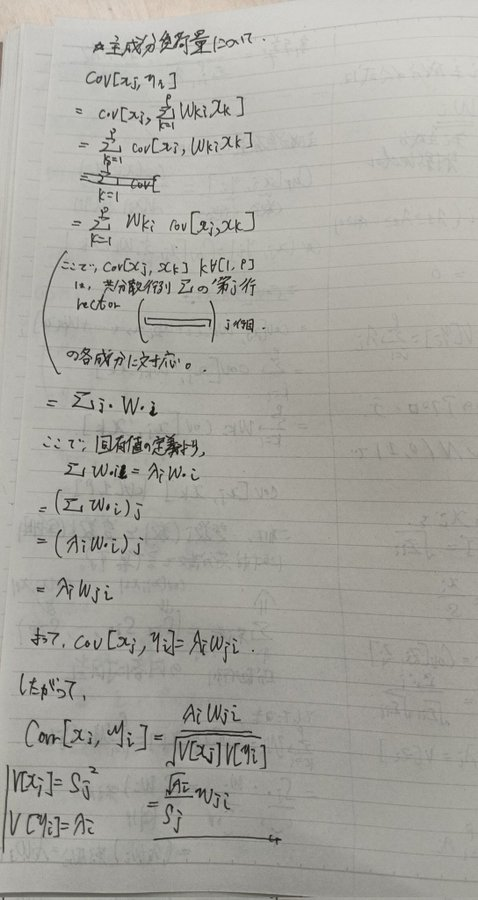

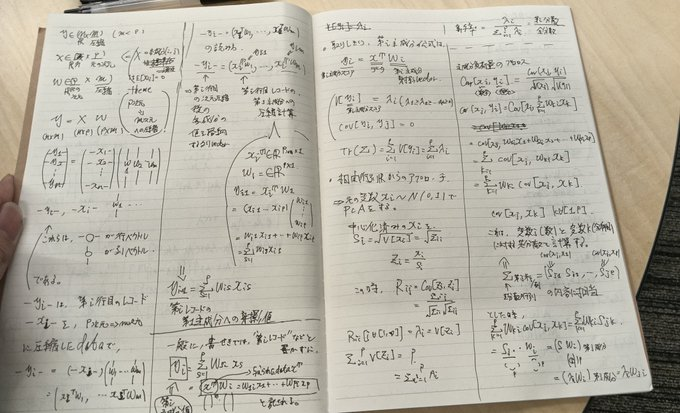